# Going Deeper(CV)_IC2 Study

# 2-7. 프로젝트: ResNet Ablation Study

오늘의 한줄
---
딥러닝 논문에서는 다양한 방법들을 적용하며, 그 방법 적용 전후의 차이를 실험 결과로 보여줍니다.

알고 가자
---
- 애블레이션 연구(ablation study) - 제거 연구
- 절제 연구는 일반적으로 모델이나 알고리즘의 일부 "기능"을 제거하고 그것이 성능에 어떻게 영향을 미치는지 보는 것을 말한다.

오늘의 궁금증
---
ResNet(Residual Connection)은 뭐할때 쓰는 물건이고?
- residual connection이 없는 일반 네트워크(plain net)와 ResNet을 비교
- ResNet이 residual connection을 활용해서 깊은 네트워크를 쌓았을 때, 이를 통한 성능 향상을 얻을 수 있음을 증명하고 있습니다.

실습목표
---
- 직접 ResNet 구현하기
- 모델을 config에 따라서 변경 가능하도록 만들기
- 직접 실험해서 성능 비교하기

개인목표
---
- ResNet 정리해서 개인 깃헙에 올리기

학습내용
---
- Ablation Study
- CIFAR-10 데이터셋 준비
- 블록 구성
- VGG Complete Model
- VGG-16 vs VGG-19
- ResNet Ablation Study

|목차||
|:-|:-|
0) 라이브러리 버전 확인하기
1) ResNet 기본 블록 구성하기
- ResNet-34와 ResNet-50 공통점
- Reference
- [Deep Residual Learning for Image Recognition(paper)](https://arxiv.org/pdf/1512.03385.pdf)
- [카이밍허님 깃헙](https://github.com/KaimingHe/deep-residual-networks)
- ResNet-34와 ResNet-50 차이점
2) ResNet-34, ResNet-50 Complete Model
- ResNet-34
- ResNet-50
3) 일반 네트워크(plain network) 만들기
- 블록 코드 수정하기
- 전체 함수 코드 수정하기
4) ResNet-50 vs Plain-50 또는 ResNet-34 vs Plain-34
- Ablation Study
- 시각화
- 추가 실험
- [Tensorflow Datasets](https://www.tensorflow.org/datasets/catalog/overview)




루브릭 평가
---
- 아래의 기준을 바탕으로 프로젝트를 평가합니다.

|평가문항|	상세기준|
|:-|:-|
|1. ResNet-34, ResNet-50 모델 구현이 정상적으로 진행되었는가?|블록함수 구현이 제대로 진행되었으며 구현한 모델의 summary가 예상된 형태로 출력되었다.|
|2. 구현한 ResNet 모델을 활용하여 Image Classification 모델 훈련이 가능한가?|cats_vs_dogs 데이터셋으로 학습시 몇 epoch동안 안정적으로 loss 감소가 진행 확인되었다.|
|3. Ablation Study 결과가 바른 포맷으로 제출되었는가?|ResNet-34, ResNet-50 각각 plain모델과 residual모델을 동일한 epoch만큼 학습시켰을 때의 validation accuracy 기준으로 Ablation Study 결과표가 작성되었다.|



오늘의 궁금증
---
ResNet(Residual Network or Connection)
- 2015년도 ILSVRC에서 우승을 차지한 모델
- 총 152개의 레이어를 가진 Ultra-deep한 네트워크
---
- Q. Deep한 네트워크가 Shallow한 네트워크보다 성능이 좋을까?
---
![Depp CNN vs Shallow CNN](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcHvVjI%2FbtqBgDVKEYe%2F5aOgQHTXQg2mwn4ixsYB40%2Fimg.png)
- 위의 그래프에서 볼때 20-layer가 56-layer보다 성능이 더 좋을 걸 볼 수 있다.
- 왜 이럴까?
---
## Optimization의 문제
- 네트워크가 깊어질 수록 Optimization(Train)하는 것이 더 어렵기 때문에
- Deep(깊은) CNN 보다 Shallow(얇은) CNN이 더 나은 성능를 보여준다.
---
## ResNet은 이 문제를 해결하고 더 깊은 156Layer의 네트워크를 훈련시키는 데에 성공하였다.

## Network 기본 문제점
- 뇌피셜)구조가 깊어지면서 과거의 정보를 잃어버리게 되는 것이 아닐까? 생각해본다
- 뇌피셜)그래서 과거의 정보를 더하므로써 ResNet의 역할이 빛을 발한다.
- 일반적으로 해결해야 하는 문제가 층 수 만큼 파라미터 수가 늘어나므로 에러가 커지는 상황이 발생한다. 다시 말해 기존의 구조로는 깊은 게 무조건 좋은 건 아니라는 것이다.

## 해결방안
- ResNet 연구진들은 신경망을 깊게 하기 위해서는 구조에 변화가 필요하다는 것을 깨달았다.
![Residual Learning](https://media.vlpt.us/images/cosmicdev/post/da754fbd-78ec-46f5-a92e-f232b77cfdbf/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-01-15%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%2010.35.58.png)

## ResNet 특징

![ResNet기본구조](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbVR4qM%2FbtqBM6x2eW8%2FIlp7ihn5KqlOXBsK54DEo0%2Fimg.png)
- ResNet은 기본적으로 VGG19의 구조를 따른다. 여기에 Convolution 층들을 추가해 깊이를 추가하고 Shortcut을 추가하면 ResNet의 가장 간단한 구조(layer 34인 plain network)가 된다.

![Residual Block](https://media.vlpt.us/images/cosmicdev/post/5ccb0c40-7102-4306-8b1d-ac1d383005fe/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-01-15%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%2010.46.00.png)
- input 값은 그대로 가져오고, 나머지 잔여 정보인 F(x)만을 추가적으로 더해주는 단순한 형태로 만들어 준다.

- 이전에 소개된 VGGNet, GoogLeNet과 같은 모델들 보다 훨씬 깊고 학습시키기도 더 쉬운 모델
- 딥러닝에서 네트워크가 깊어질수록 성능이 올라가지만 학습이 어려워지는데, 이에 해결 방안으로 네트워크의 깊이를 늘리면서 안정적인 학습을 위해 ResNet이 탄생함.
- 핵심 기술은 residual function
- Plain Nerwork VS ResNet
![Plain Nerwork VS ResNet](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FqSLDE%2FbtqYE8y96aq%2FptTau1wCNqnedWlHZ4LL61%2Fimg.png)
![Plain Nerwork VS ResNet](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FrUPNa%2FbtqYDj17YPx%2FLfgFTWCpN0qLPHw9u0P880%2Fimg.png)
- 기존방식보다 기존방식에서 Resdual function을 적용한 결과의 차이점이 보인다.
- Layers가 깊어질 수록 성능차이가 더 많이 나는 것을 볼 수 있다.
- ResNet의 Error가 25.03%로 더 적어지는 것을 볼 수 있다.

# Ablation Study 실습 (1) CIFAR-10 데이터셋 준비하기
CIFAR-10 데이터세트는 10개 클래스의 60000개의 32x32 컬러 이미지로 구성되며 클래스당 6000개의 이미지가 있습니다. 50000개의 훈련 이미지와 10000개의 테스트 이미지가 있습니다.
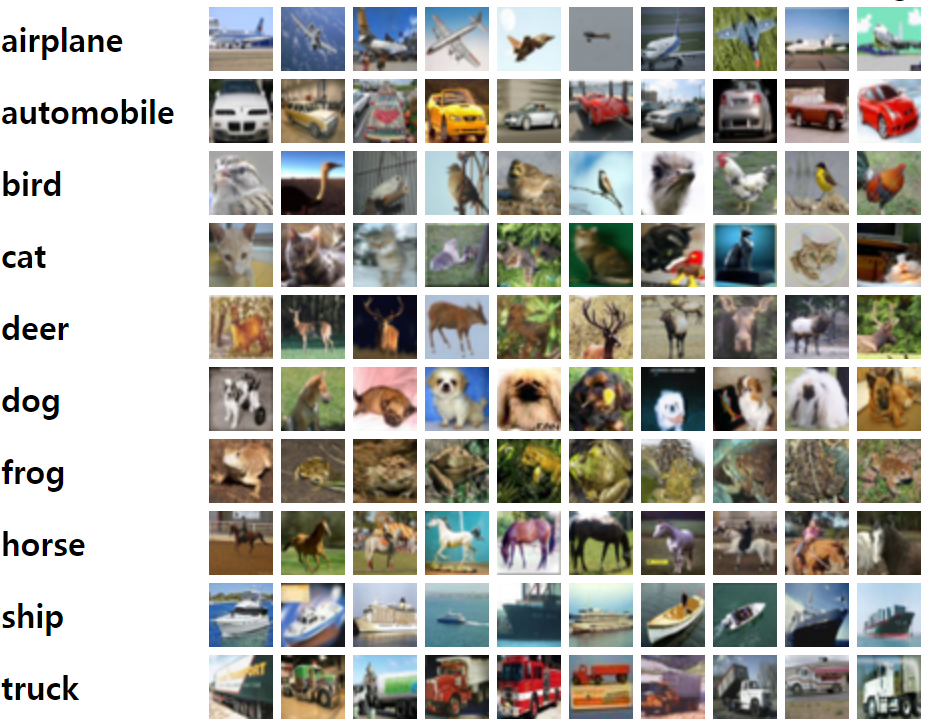

---
# 0) 라이브러리 버전 확인하기

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import tensorflow_datasets as tfds

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import warnings; warnings.filterwarnings(action='ignore') # 경고 메세지 숨기기/표시 (action='ignore')/(action='default')


In [4]:
# Check Version
print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


In [5]:
# Tensorflow가 활용할 GPU가 장착되어 있는지 확인해 봅니다.
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
import urllib3
urllib3.disable_warnings()

#tfds.disable_progress_bar()   # 이 주석을 풀면 데이터셋 다운로드과정의 프로그레스바가 나타나지 않습니다.

(ds_train, ds_test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling cifar10-train.tfrecord...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling cifar10-test.tfrecord...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /aiffel/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [7]:
# Tensorflow 데이터셋을 로드하면 꼭 feature 정보를 확인해 보세요. 
print(ds_info.features)

FeaturesDict({
    'id': Text(shape=(), dtype=tf.string),
    'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})


In [8]:
# 데이터의 개수도 확인해 봅시다. 
print(tf.data.experimental.cardinality(ds_train))
print(tf.data.experimental.cardinality(ds_test))

tf.Tensor(50000, shape=(), dtype=int64)
tf.Tensor(10000, shape=(), dtype=int64)


>Tensorflow의 데이터셋은 Numpy가 아니므로 ds_train.shape 같은 게 존재하지 않습니다. 위와 같은 방법으로 데이터셋의 이미지 shape와 전체 데이터의 개수, 라벨 클래스의 개수 등 가장 중요한 정보들이 잘 확인되었나요?Tensorflow의 데이터셋은 Numpy가 아니므로 ds_train.shape 같은 게 존재하지 않습니다. 위와 같은 방법으로 데이터셋의 이미지 shape와 전체 데이터의 개수, 라벨 클래스의 개수 등 가장 중요한 정보들이 잘 확인되었나요?

Input Normalization
---
- Data Normalization 은 데이터의 범위를 사용자가 원하는 범위로 제한하는 것
- 우리의 모델에 넣어주기 전에는 각 채널별 최댓값인 255로 정규화(normalize)를 해주어 이미지의 표현이 0과 1 사이로 들어오도록 만들어줍니다.



In [9]:
def normalize_and_resize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    # image = tf.image.resize(image, [32, 32])
    return tf.cast(image, tf.float32) / 255., label

In [10]:
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16):
    ds = ds.map(
        normalize_and_resize_img, 
        num_parallel_calls=1
    )
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

In [11]:
# Check No.Class
ds_info.features["label"].num_classes

10

In [12]:
# Check names
ds_info.features["label"].names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

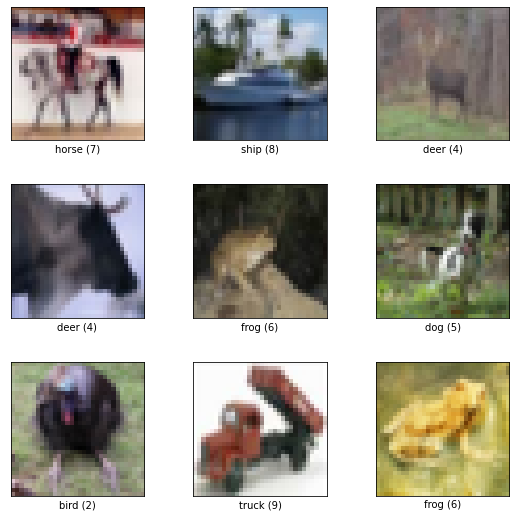

In [13]:
fig = tfds.show_examples(ds_train, ds_info)

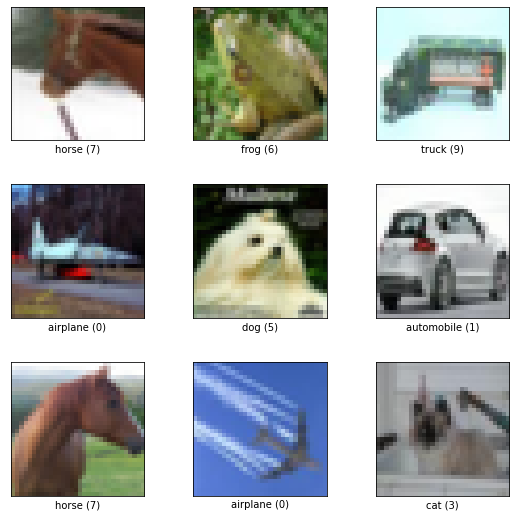

In [14]:
fig = tfds.show_examples(ds_test, ds_info)

코딩을 하면서 모델을 직접 빌딩 해봅시다

Ablation Study 실습 (2) 블록 구성하기
---
최근 나오는 일반적인 딥러닝 모델에서 이렇게 주요 구조를 모듈화 시켜 조금씩 바꾸어 쓸 수 있는 단위를 블록(block) 이라고 부릅니다. 레이어(layer) 는 기본적으로 텐서플로우(TensorFlow), 케라스(Keras), 파이토치(PyTorch) 등에서 기본적으로 제공하는 단위입니다. 우리는 여기서 한 단계 위인 "블록"을 단위로 모델을 만들 수 있어야 합니다.
![ResNet](https://d3s0tskafalll9.cloudfront.net/media/images/resnet.max-800x600.png)

> 프로젝트로 구현할 ResNet을 보면 ResNet-18, 34, 50, 101, 152로 다섯 가지 네트워크

VGG 기본 블록 만들기
---
![VGG](https://d3s0tskafalll9.cloudfront.net/media/images/vgg_structure.max-800x600.png)

- VGG의 블록은 개략적으로 CNN 레이어 여러 개와 Max pooling 레이어 한 개로 이루어집니다. CNN은 모두 커널 크기가 3x3 라는 대표적인 특징
- 우리의 블록은 CNN 레이어 여러 개와 Max pooling 레이어 한 개로 이루어질 것이고, CNN의 레이어 수와 채널을 조절할 수 있어야 합니다.
- block_num은 레이어의 이름을 붙여주기 위해서 추가되었고 input_shape는 summary를 출력하기 위해서 넣어주었습니다.

In [15]:
# function for building VGG Block

def build_vgg_block(input_layer,
                    num_cnn=3, 
                    channel=64,
                    block_num=1,
                   ):
    # 입력 레이어
    x = input_layer

    # CNN 레이어
    for cnn_num in range(num_cnn):
        x = keras.layers.Conv2D(
            filters=channel,
            kernel_size=(3,3), # 커널 사이즈 (3,3) : 커널 사이즈가 작기 때문에 네트워크 깊이를 깊게 만들 수 있다.
            activation='relu',
            kernel_initializer='he_normal',
            padding='same',
            name=f'block{block_num}_conv{cnn_num}'
        )(x)    

    # Max Pooling 레이어
    x = keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        strides=2,
        name=f'block{block_num}_pooling'
    )(x)

    return x

커널 사이즈 3X3 쓰는 이유?
---
3 x 3 필터로 세 차례 컨볼루션을 하는 것이 7 x 7 필터로 한 번 컨볼루션하는 것보다 나은 점은 무엇일까? 일단 가중치 또는 파라미터의 갯수의 차이다. 3 x 3 필터가 3개면 총 27개의 가중치를 갖는다. 반면 7 x 7 필터는 49개의 가중치를 갖는다. CNN에서 가중치는 모두 훈련이 필요한 것들이므로, 가중치가 적다는 것은 그만큼 훈련시켜야할 것의 갯수가 작아진다. 따라서 학습의 속도가 빨라진다. 동시에 층의 갯수가 늘어나면서 특성에 비선형성을 더 증가시키기 때문에 특성이 점점 더 유용해진다. 

In [16]:
vgg_input_layer = keras.layers.Input(shape=(32,32,3))   # 입력 레이어 생성
vgg_block_output = build_vgg_block(vgg_input_layer)    # VGG 블록 생성

In [17]:
# 블록 1개짜리 model 생성
model = keras.Model(inputs=vgg_input_layer, outputs=vgg_block_output)  

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv0 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pooling (MaxPooling2D (None, 16, 16, 64)        0         
Total params: 75,648
Trainable params: 75,648
Non-trainable params: 0
_________________________________________________________________


Ablation Study 실습 (3) VGG Complete Model
---
 기본적인 블록을 만들 수 있는 함수를 만들었으니 이를 합쳐서 전체 모델을 만들 수 있는 함수를 만들어보겠습니다.

1) VGG-16
---
- 블록 내의 CNN 레이어 수와 채널 수는 블록마다 달라집니다.
- 이는 VGG-16과 VGG-19에 따라서 같이 변화되므로 함수에 전달되어야 합니다.
- 여기서는 각 블록 별 CNN의 수와 채널을 리스트로 전달했습니다.

# VGG 모델 자체를 생성하는 함수입니다.

In [18]:
# VGG 모델 자체를 생성하는 함수입니다.
def build_vgg(input_shape=(32,32,3),
              num_cnn_list=[2,2,3,3,3], # 각 층의 레이어 개수 : VGG 16 Weight (총 6개의 구조(A, A-LRN, B, C, D, E) : D 구조)
              channel_list=[64,128,256,512,512], # 각 층 레이어의 필터수(채널)
              num_classes=10):
    
    assert len(num_cnn_list) == len(channel_list) #모델을 만들기 전에 config list들이 같은 길이인지 확인합니다.
    
    input_layer = keras.layers.Input(shape=input_shape)  # input layer를 만들어둡니다.
    output = input_layer
    
    # config list들의 길이만큼 반복해서 블록을 생성합니다.
    for i, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)):
        output = build_vgg_block(
            output,
            num_cnn=num_cnn, 
            channel=channel,
            block_num=i
        )
        
    output = keras.layers.Flatten(name='flatten')(output)
    output = keras.layers.Dense(4096, activation='relu', name='fc1')(output)
    output = keras.layers.Dense(4096, activation='relu', name='fc2')(output)
    output = keras.layers.Dense(num_classes, activation='softmax', name='predictions')(output)
    
    model = keras.Model(
        inputs=input_layer, 
        outputs=output
    )
    return model

# VGG16 구조
![VGG16 구조](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FK990l%2FbtqwDJ7C54R%2F664Ksm6gyTGBR1wK3YPDFk%2Fimg.png)

![VGG16 구조](https://editor.analyticsvidhya.com/uploads/51271vgg.jpeg)

In [19]:
# 기본값을 그대로 사용해서 VGG 모델을 만들면 VGG-16이 됩니다.
vgg_16 = build_vgg()

vgg_16.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block0_conv0 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block0_conv1 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block0_pooling (MaxPooling2D (None, 16, 16, 64)        0         
_________________________________________________________________
block1_conv0 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block1_pooling (MaxPooling2D (None, 8, 8, 128)         0   

VGG-19
---
위에서 16을 만들어봤으니 쉽게 구성(configuration)을 바꿔서 VGG-19를 만들 수 있습니다.

# VGG-19 구조
![VGG19 구조](https://blog.kakaocdn.net/dn/CPZHE/btq2hCcsjfO/kB0UWjg8rBkAjdN2J58kV0/img.jpg)
![VGG19 구조](https://www.researchgate.net/profile/Mohammad-Motiur-Rahman/publication/342815128/figure/fig1/AS:911393398198283@1594304527986/Illustration-of-fine-tuned-VGG19-pre-trained-CNN-model.png)

In [26]:
# 원하는 블록의 설계에 따라 매개변수로 리스트를 전달해 줍니다.
vgg_19 = build_vgg(
    num_cnn_list=[2,2,4,4,4],
    channel_list=[64,128,256,512,512]
)

vgg_19.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block0_conv0 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block0_conv1 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block0_pooling (MaxPooling2D (None, 16, 16, 64)        0         
_________________________________________________________________
block1_conv0 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block1_pooling (MaxPooling2D (None, 8, 8, 128)         0   

Ablation Study 실습 (4) VGG-16 vs VGG-19
---
- VGG는 레이어의 차이를 위해서 VGG-16과 VGG-19를 비교해보도록 하겠습니다.

- 우선 CIFAR-10 데이터셋을 불러옵시다.
![VGG16 VS VGG19](https://pic1.xuehuaimg.com/proxy/csdn/https://img-blog.csdnimg.cn/20190808093025336.png)

In [27]:
BATCH_SIZE = 256
EPOCH = 15

In [28]:
(ds_train, ds_test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    as_supervised=True,
    shuffle_files=True,
    with_info=True,
)
ds_train = apply_normalize_on_dataset(ds_train, batch_size=BATCH_SIZE)
ds_test = apply_normalize_on_dataset(ds_test, batch_size=BATCH_SIZE)

- 이 작업은 시간이 상당히 소요됩니다.
- BATCH_SIZE가 커지면 소요시간이 좀 줄어드는 효과가 있습니다만, 1epoch당 1분 이상 소요될 수도 있습니다.
- 이 훈련은 40Epoch 정도 수행하는 것을 권장하지만, 15Epoch 정도로도 어느 정도 근접하는 성능을 얻을 수는 있을 것입니다.

In [22]:
vgg_16.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_16 = vgg_16.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['test'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

/opt/conda/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/15
195/195 [==============================] - 73s 128ms/step - loss: 2.1961 - accuracy: 0.1856 - val_loss: 2.1185 - val_accuracy: 0.2106
Epoch 2/15
195/195 [==============================] - 23s 118ms/step - loss: 2.0066 - accuracy: 0.2747 - val_loss: 1.9257 - val_accuracy: 0.3100
Epoch 3/15
195/195 [==============================] - 24s 122ms/step - loss: 1.8781 - accuracy: 0.3226 - val_loss: 1.7754 - val_accuracy: 0.3698
Epoch 4/15
195/195 [==============================] - 23s 120ms/step - loss: 1.7597 - accuracy: 0.3665 - val_loss: 1.7216 - val_accuracy: 0.3820
Epoch 5/15
195/195 [==============================] - 23s 120ms/step - loss: 1.6861 - accuracy: 0.3901 - val_loss: 1.6508 - val_accuracy: 0.4028
Epoch 6/15
195/195 [==============================] - 23s 120ms/step - loss: 1.6115 - accuracy: 0.4194 - val_loss: 1.5881 - val_accuracy: 0.4330
Epoch 7/15
195/195 [==============================] - 23s 121ms/step - loss: 1.5459 - accuracy: 0.4438 - val_loss: 1.5389 - val_ac

In [29]:
vgg_19.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_19 = vgg_19.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['test'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/15
195/195 [==============================] - 33s 140ms/step - loss: 2.2276 - accuracy: 0.1614 - val_loss: 2.1537 - val_accuracy: 0.1860
Epoch 2/15
195/195 [==============================] - 27s 140ms/step - loss: 2.0679 - accuracy: 0.2440 - val_loss: 1.9888 - val_accuracy: 0.2903
Epoch 3/15
195/195 [==============================] - 28s 142ms/step - loss: 1.9373 - accuracy: 0.2944 - val_loss: 1.8850 - val_accuracy: 0.3331
Epoch 4/15
195/195 [==============================] - 27s 141ms/step - loss: 1.8096 - accuracy: 0.3469 - val_loss: 1.7701 - val_accuracy: 0.3723
Epoch 5/15
195/195 [==============================] - 27s 141ms/step - loss: 1.7079 - accuracy: 0.3832 - val_loss: 1.6395 - val_accuracy: 0.4099
Epoch 6/15
195/195 [==============================] - 27s 141ms/step - loss: 1.6385 - accuracy: 0.4075 - val_loss: 1.6125 - val_accuracy: 0.4159
Epoch 7/15
195/195 [==============================] - 27s 141ms/step - loss: 1.5798 - accuracy: 0.4276 - val_loss: 1.5415 - val_ac

# VGG-16과 VGG-19를 그래프를 그리고 비교해보도록 하겠습니다.
- 먼저 훈련 손실(training loss)이 어떻게 다르게 진행되는지 비교해봅시다.

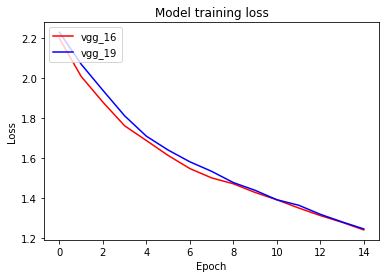

In [31]:
import matplotlib.pyplot as plt

plt.plot(history_16.history['loss'], 'r')
plt.plot(history_19.history['loss'], 'b')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['vgg_16', 'vgg_19'], loc='upper left')
plt.show()

# 검증 정확도(validation accuracy)

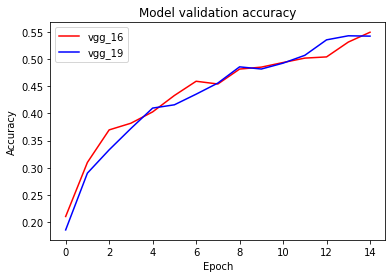

In [32]:
plt.plot(history_16.history['val_accuracy'], 'r')
plt.plot(history_19.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['vgg_16', 'vgg_19'], loc='upper left')
plt.show()

# appendix

- [Quora](https://namu.wiki/w/Quora) 쿼라 
- 네이버 지식인 외국버전,차이점은 실명제
- 세계적인 소셜네트워크 연동 질의응답 서비스
- 사용자 커뮤니티에 의해 질문을 요청하고 질문에 답변하며 수정 및 정리하는 질의 응답 웹사이트
- 유명인들도 많이 사용( 버락 오바마, 힐러리 클린턴과 같은 정치인부터 시작해서 지미 웨일스, 마크 저커버그, 애쉬튼 커쳐, 엠마 왓슨, Avicii, 놈 촘스키 등)
- 포털 사이트에서 제공하는 다른 질문·답변 사이트들과 달리 질문과 답변은 제목과 본문이 구분돼 있지 않다. 굳이 따지자면 질문은 제목만 쓸 수 있고, 답변은 본문만 쓸 수 있다.
- Quora는 전에 페이스북 직원이었던 애덤 디앤절로(Adam D'Angelo)와 찰리 치버(Charlie Cheever)가 2009년에 6월에 설립하였다. Quora라는 이름이 어떻게 정해졌냐고 묻는 질문에 치버는 "몇 시간 동안 브레인스토밍을 하면서 모든 아이디어들을 적었고, 마음에 들지 않은 것들은 다 지워 버리면서 결국 Quora로 정해졌다"고 답했다. Quora 다음으로 유력한 후보는 Quiver(떨다,화살통)인데, 이 이름은 별로라는 의견이 많다.
- 한국판 쿼라(Quara) ‘WISE10’

# Reference

- [Deep Residual Learning for Image Recognition(paper)](https://arxiv.org/pdf/1512.03385.pdf)
- [ResNet(Residual Connection)](https://itrepo.tistory.com/36)
- [ResNet(Residual Connection)](https://itrepo.tistory.com/36#Difficulty-of-Training-Deep-CNN)
- [ResNet(이론)](https://ardino.tistory.com/45)
- [ResNet특징 몇가지](https://velog.io/@cosmicdev/ResNet%ED%8A%B9%EC%A7%95-%EB%AA%87%EA%B0%80%EC%A7%80)
- [Quora](https://www.quora.com/In-the-context-of-deep-learning-what-is-an-ablation-study)

- [Tensorflow Datasets](https://www.tensorflow.org/datasets/catalog/overview)
- [TensorFlow - Cifar10](https://www.tensorflow.org/datasets/catalog/cifar10)
- [3X3 커널 사이즈가 효율적 - 파라미터의 개수 차이 때문에](https://bskyvision.com/504)
- [VGG 16 구조](https://www.analyticsvidhya.com/blog/2021/06/transfer-learning-using-vgg16-in-pytorch/)
- [VGG 19 구조](https://exupery-1.tistory.com/207)
- [VGG 19 구조](https://www.researchgate.net/figure/Illustration-of-fine-tuned-VGG19-pre-trained-CNN-model_fig1_342815128)

- [카이밍허님 깃헙](https://github.com/KaimingHe/deep-residual-networks)